In [19]:
#file upload section
from google.colab import files
uploaded = files.upload()

Saving my_dataset.npz to my_dataset (1).npz


In [29]:
# Step-1: Imports & Config
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model

DATA_PATH = "my_dataset.npz"

In [30]:
# Step-2: Load Dataset
if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"{DATA_PATH} not found. Place it beside this script.")

data = np.load(DATA_PATH)
X_train, X_test = data['x_train'], data['x_test']
y_train, y_test = data['y_train'], data['y_test']

print("Raw shapes:",
      X_train.shape, X_test.shape, y_train.shape, y_test.shape)


Raw shapes: (2084, 28, 28, 1) (522, 28, 28, 1) (2084,) (522,)


In [35]:
# Step-3: Sanity Checks

if y_train.ndim > 1: y_train = y_train.reshape(-1,)
if y_test.ndim  > 1: y_test  = y_test.reshape(-1,)


if X_train.ndim == 4 and X_train.shape[-1] == 1:
    X_train = np.squeeze(X_train, -1)
    X_test  = np.squeeze(X_test, -1)

assert X_train.ndim == 3 and X_test.ndim == 3



In [36]:
# Step-4: Normalize
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0


In [37]:
# Step-5: Build Model
inputs = Input((28, 28))
x = Flatten()(inputs)
x = Dense(256, activation="relu")(x)
x = Dense(128, activation="relu")(x)
x = Dense(64, activation="relu")(x)
x = Dense(32, activation="relu")(x)
outputs = Dense(10, activation="softmax")(x)
model = Model(inputs, outputs)

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,522 (955.16 KB)

 Trainable params: 244,522 (955.16 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Step-6: Train
history = model.fit(
    X_train, y_train,
    epochs=20,          # চাইলে বাড়াতে পারেন
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)



Epoch 1/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.2302 - loss: 2.2082 - val_accuracy: 0.3257 - val_loss: 1.8981
Epoch 2/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4144 - loss: 1.6821 - val_accuracy: 0.4713 - val_loss: 1.5488
Epoch 3/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5716 - loss: 1.2948 - val_accuracy: 0.4732 - val_loss: 1.4488
Epoch 4/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6096 - loss: 1.1418 - val_accuracy: 0.5307 - val_loss: 1.3423
Epoch 5/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6837 - loss: 0.9266 - val_accuracy: 0.5613 - val_loss: 1.2880
Epoch 6/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6962 - loss: 0.8905 - val_accuracy: 0.6054 - val_loss: 1.3613
Epoch 7/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7307 - loss: 0.7905 - val_accuracy: 0.5881 - val_loss: 1.3889
Epoch 8/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7346 - loss: 0.7680 - val_accuracy: 0.5785 - val_los

In [39]:
# Step-7: Evaluate
y_prob = model.predict(X_test, verbose=0)
y_pred = y_prob.argmax(axis=1)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", float(acc))


Test Accuracy: 0.6762452107279694


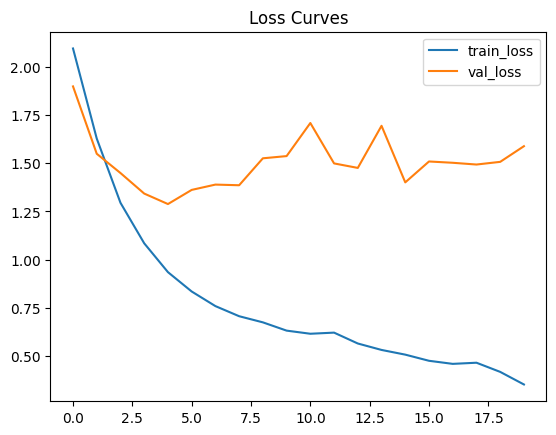

In [40]:
# Step-8: Plot Loss Curves
plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss Curves')
plt.legend()
plt.show()



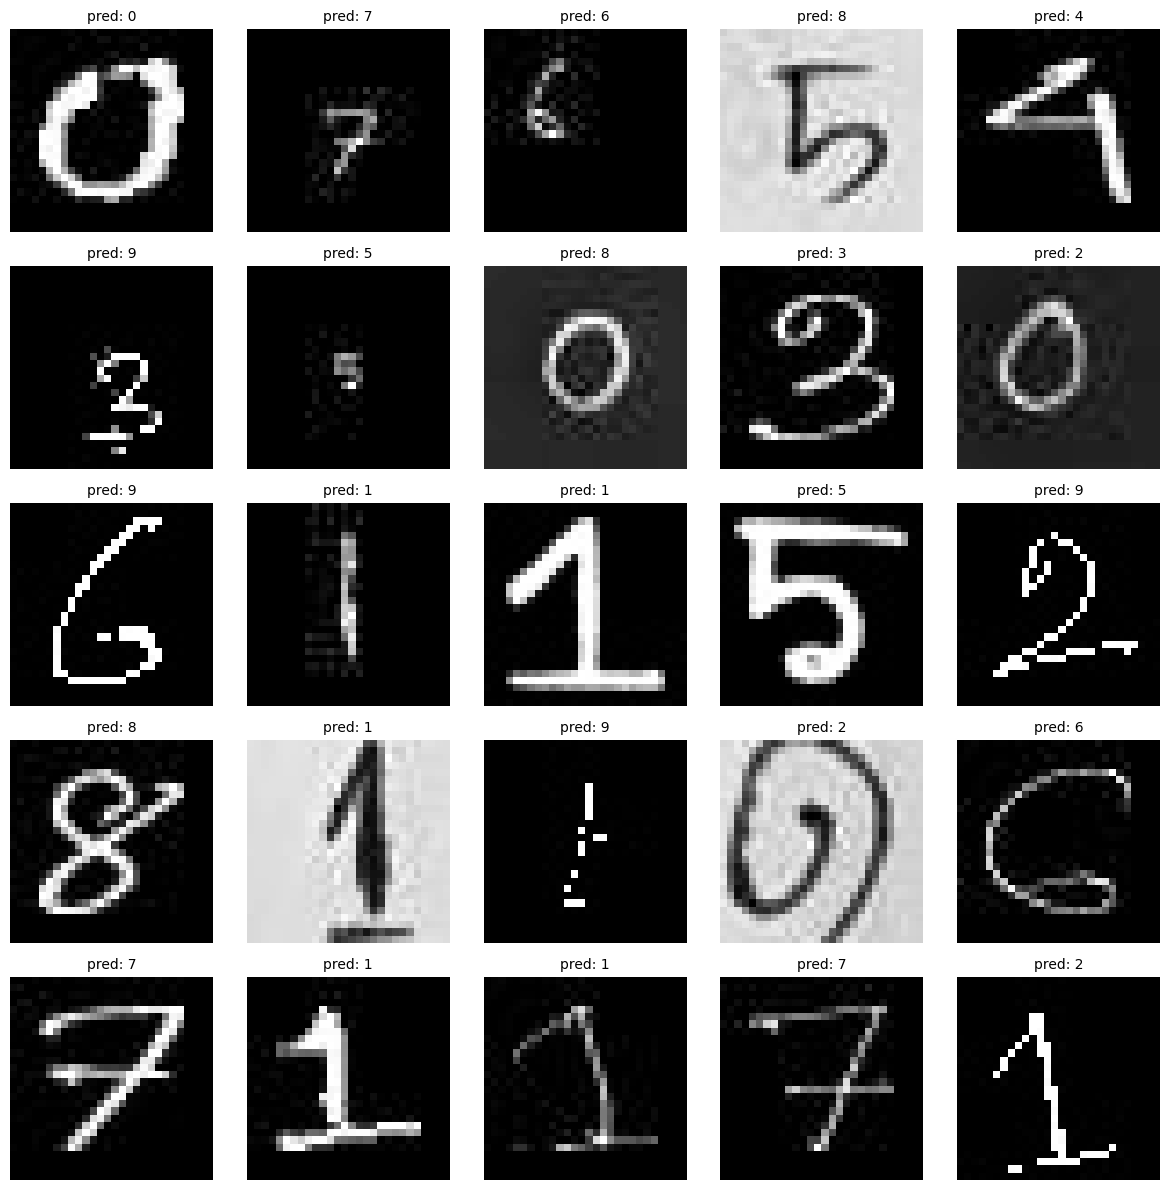

In [41]:
# Step-9: Show Predictions Grid
plt.figure(figsize=(12, 12))
rows, cols = 5, 5
n_show = min(rows*cols, len(X_test))

for i in range(n_show):
    plt.subplot(rows, cols, i+1)
    sample = X_test[i].reshape(1, 28, 28)
    pred = model.predict(sample, verbose=0).argmax(axis=1)[0]
    plt.title(f"pred: {pred}", fontsize=10)
    plt.imshow(X_test[i], cmap="gray")
    plt.axis('off')

plt.tight_layout()
plt.show()
